In [1]:
import colorsys
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

c:\Users\Junni\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BAR_WIDTH = 0.2
GROUP_SEP = 0.05
PHENOTYPE_SEP = 0.5

BAR_STYLE = dict(width=BAR_WIDTH, linewidth=0.0)
MARKER_STYLE = dict(marker="*", color="black")

In [3]:
df = pd.read_csv("../output_tables/CNVRS_ANOVA_updated.csv")
D = defaultdict(list)
for _, row in df.iterrows():
    entry = (row["adj.r"], row["adj.r_rs"], row["anova_p"] < 0.05)
    D[row["phenotype"]].append(entry)

#change key 'sqrt(tangles)' to 'Tangle Density'
D["Tangle Density"] = D.pop("sqrt(tangles)")
D["Overall Amyloid Level"] = D.pop("sqrt(amyloid)")
D["Global Cognitive \nFunction"] = D.pop("cogn_global")
D["Cerebral Atherosclerosis \nRating"] = D.pop("cvda_4gp2")
D["Arteriolsclerosis"] = D.pop("arteriol_scler")
D["Final Consesus \nCognitive Diagnosis"] = D.pop("cogdx")
# make a new dictionary of only the 'cogdx' key from D
cogdx_D = {k: v for k, v in D.items() if k == "Final Consesus \nCognitive Diagnosis"}
D.pop("Final Consesus \nCognitive Diagnosis")
cogdx_D

{'Final Consesus \nCognitive Diagnosis': [(0.327, 0.328, False),
  (0.327, 0.329, False),
  (0.327, 0.328, False),
  (0.327, 0.328, False)]}

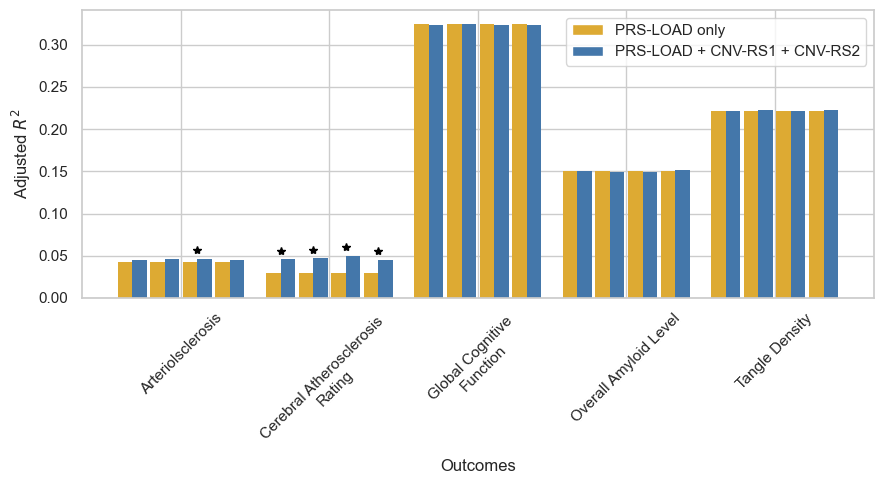

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import colorsys

# Assuming you have D and other constants defined before this snippet

colour_palette = ['#DDAA33', '#4477AA']  # Use '#' before hex code

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(9, 5))

ticks = []
tick_labels = []
start = 0
cmap = sns.color_palette("muted", len(D))

for phenotype, c in zip(sorted(D), cmap):
    chls = colorsys.rgb_to_hls(*c)
    cdarker = colorsys.hls_to_rgb(chls[0] + 0.05, 0.5 * chls[1], 0.9 * chls[2])

    rs, r_rss, stars = list(zip(*D[phenotype]))

    x = ((2 * BAR_WIDTH) + GROUP_SEP) * np.arange(len(rs)) + start
    ax.bar(x, rs, label=f"{phenotype}, adj.r", color=mcolors.hex2color(colour_palette[0]), **BAR_STYLE)

    x = x + BAR_WIDTH
    ax.bar(x, r_rss, label=f"{phenotype}, adj.r_rs", color=mcolors.hex2color(colour_palette[1]), **BAR_STYLE)

    for i, s in enumerate(stars):
        if not s:
            continue
        ax.plot(x[i] - BAR_WIDTH / 2, max(rs[i], r_rss[i]) + 0.01, **MARKER_STYLE)

    ticks.append((start + x.max()) / 2)
    start = x.max() + PHENOTYPE_SEP
    tick_labels.append(phenotype)

# Set x-axis labels to be the phenotype names
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, ha="center", rotation=45)

ax.set_xlabel("Outcomes")
ax.set_ylabel("Adjusted $R^2$")

# Create a custom legend with the specified handles and labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=mcolors.hex2color(colour_palette[0])),
                  plt.Rectangle((0, 0), 1, 1, fc=mcolors.hex2color(colour_palette[1]))]
legend_labels = ['PRS-LOAD only', 'PRS-LOAD + CNV-RS1 + CNV-RS2']
ax.legend(legend_handles, legend_labels)
#ax.xaxis.labelpad = 20 

fig.tight_layout()

plt.show()


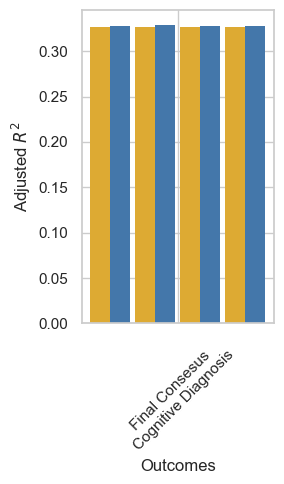

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import colorsys

# Assuming you have D and other constants defined before this snippet

colour_palette = ['#DDAA33', '#4477AA']  # Use '#' before hex code

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(3, 5))

ticks = []
tick_labels = []
start = 0
cmap = sns.color_palette("muted", len(cogdx_D))

for phenotype, c in zip(sorted(cogdx_D), cmap):
    chls = colorsys.rgb_to_hls(*c)
    cdarker = colorsys.hls_to_rgb(chls[0] + 0.05, 0.5 * chls[1], 0.9 * chls[2])

    rs, r_rss, stars = list(zip(*cogdx_D[phenotype]))

    x = ((2 * BAR_WIDTH) + GROUP_SEP) * np.arange(len(rs)) + start
    ax.bar(x, rs, label=f"{phenotype}, adj.r", color=mcolors.hex2color(colour_palette[0]), **BAR_STYLE)

    x = x + BAR_WIDTH
    ax.bar(x, r_rss, label=f"{phenotype}, adj.r_rs", color=mcolors.hex2color(colour_palette[1]), **BAR_STYLE)

    for i, s in enumerate(stars):
        if not s:
            continue
        ax.plot(x[i] - BAR_WIDTH / 2, max(rs[i], r_rss[i]) + 0.01, **MARKER_STYLE)

    ticks.append((start + x.max()) / 2)
    start = x.max() + PHENOTYPE_SEP
    tick_labels.append(phenotype)

# Set x-axis labels to be the phenotype names
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, ha="center", rotation=45)

ax.set_xlabel("Outcomes")
ax.set_ylabel("Adjusted $R^2$")

fig.tight_layout()
plt.show()


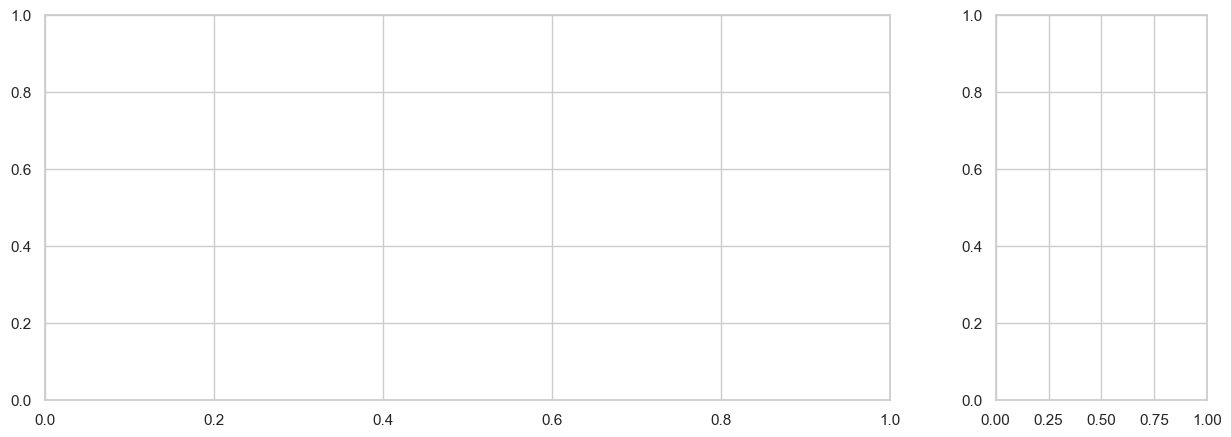

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the plots
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)


# Create a figure and axis using subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [4, 1]})



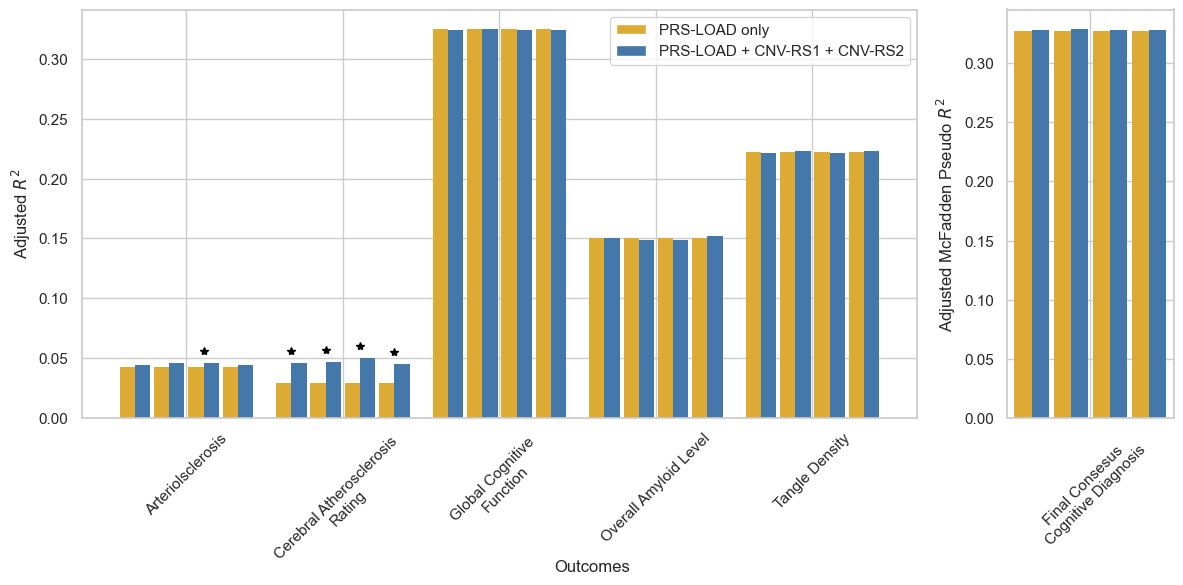

In [9]:
# Create a figure and axis using subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [5, 1]})


colour_palette = ['#DDAA33', '#4477AA']  # Use '#' before hex code

sns.set_theme(style="whitegrid")


ticks = []
tick_labels = []
start = 0
cmap = sns.color_palette("muted", len(D))

for phenotype, c in zip(sorted(D), cmap):
    chls = colorsys.rgb_to_hls(*c)
    cdarker = colorsys.hls_to_rgb(chls[0] + 0.05, 0.5 * chls[1], 0.9 * chls[2])

    rs, r_rss, stars = list(zip(*D[phenotype]))

    x = ((2 * BAR_WIDTH) + GROUP_SEP) * np.arange(len(rs)) + start
    ax[0].bar(x, rs, label=f"{phenotype}, adj.r", color=mcolors.hex2color(colour_palette[0]), **BAR_STYLE)

    x = x + BAR_WIDTH
    ax[0].bar(x, r_rss, label=f"{phenotype}, adj.r_rs", color=mcolors.hex2color(colour_palette[1]), **BAR_STYLE)

    for i, s in enumerate(stars):
        if not s:
            continue
        ax[0].plot(x[i] - BAR_WIDTH / 2, max(rs[i], r_rss[i]) + 0.01, **MARKER_STYLE)

    ticks.append((start + x.max()) / 2)
    start = x.max() + PHENOTYPE_SEP
    tick_labels.append(phenotype)

# Set x-axis labels to be the phenotype names
ax[0].set_xticks(ticks)
ax[0].set_xticklabels(tick_labels, ha="center", rotation=45)

ax[0].set_ylabel("Adjusted $R^2$")

# Create a custom legend with the specified handles and labels
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=mcolors.hex2color(colour_palette[0])),
                  plt.Rectangle((0, 0), 1, 1, fc=mcolors.hex2color(colour_palette[1]))]
legend_labels = ['PRS-LOAD only', 'PRS-LOAD + CNV-RS1 + CNV-RS2']
ax[0].legend(legend_handles, legend_labels)


############################

ticks = []
tick_labels = []
start = 0
cmap = sns.color_palette("muted", len(cogdx_D))

for phenotype, c in zip(sorted(cogdx_D), cmap):
    chls = colorsys.rgb_to_hls(*c)
    cdarker = colorsys.hls_to_rgb(chls[0] + 0.05, 0.5 * chls[1], 0.9 * chls[2])

    rs, r_rss, stars = list(zip(*cogdx_D[phenotype]))

    x = ((2 * BAR_WIDTH) + GROUP_SEP) * np.arange(len(rs)) + start
    ax[1].bar(x, rs, label=f"{phenotype}, adj.r", color=mcolors.hex2color(colour_palette[0]), **BAR_STYLE)

    x = x + BAR_WIDTH
    ax[1].bar(x, r_rss, label=f"{phenotype}, adj.r_rs", color=mcolors.hex2color(colour_palette[1]), **BAR_STYLE)

    for i, s in enumerate(stars):
        if not s:
            continue
        ax[1].plot(x[i] - BAR_WIDTH / 2, max(rs[i], r_rss[i]) + 0.01, **MARKER_STYLE)

    ticks.append((start + x.max()) / 2)
    start = x.max() + PHENOTYPE_SEP
    tick_labels.append(phenotype)

# Set x-axis labels to be the phenotype names
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tick_labels, ha="center", rotation=45)

ax[1].set_ylabel("Adjusted McFadden Pseudo $R^2$")

fig.text(0.5, 0.04, 'Outcomes', ha='center', va='center', fontsize=12)

fig.tight_layout()

plt.show()

# save the figure
fig.savefig('../output_figs/PRS_interaction.png', dpi=300, bbox_inches='tight')
# save as svg
fig.savefig('../output_figs/PRS_interaction.svg', format='svg', dpi=300, bbox_inches='tight')
